In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from collections import Counter

In [3]:
dataset = pd.read_csv('../spam.csv')

In [4]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
documents = dataset["v2"]

In [6]:
documents[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    stopwords_eng = stopwords.words("english")
    text = " ".join([word for word in text.split() if word not in stopwords_eng])
    text = " ".join([word for word in text.split() if len(word) > 2])

    return text

cleaned_documents = [clean_text(document) for document in documents]

In [8]:
cleaned_documents[:5]

['jurong point crazy available bugis great world buffet cine got amore wat',
 'lar joking wif oni',
 'free entry wkly comp win cup final tkts may text receive entry questionstd txt ratetcs apply overs',
 'dun say early hor already say',
 'nah dont think goes usf lives around though']

In [9]:
vectorizer = CountVectorizer()

In [10]:
X = vectorizer.fit_transform(cleaned_documents)

In [11]:
feature_names = vectorizer.get_feature_names_out()

In [12]:
feature_names[:5]

array(['____', '_ll', '_thanks', 'aah', 'aaniye'], dtype=object)

In [42]:
vector_representation = X.toarray()

In [14]:
word_counts = X.sum(axis = 0).A1
word_freq = dict(zip(feature_names, word_counts))

most_common_10_words = Counter(word_freq).most_common(10)
most_common_10_words

[('call', 579),
 ('get', 390),
 ('dont', 290),
 ('free', 278),
 ('ltgt', 276),
 ('know', 257),
 ('like', 242),
 ('ill', 241),
 ('got', 239),
 ('good', 234)]

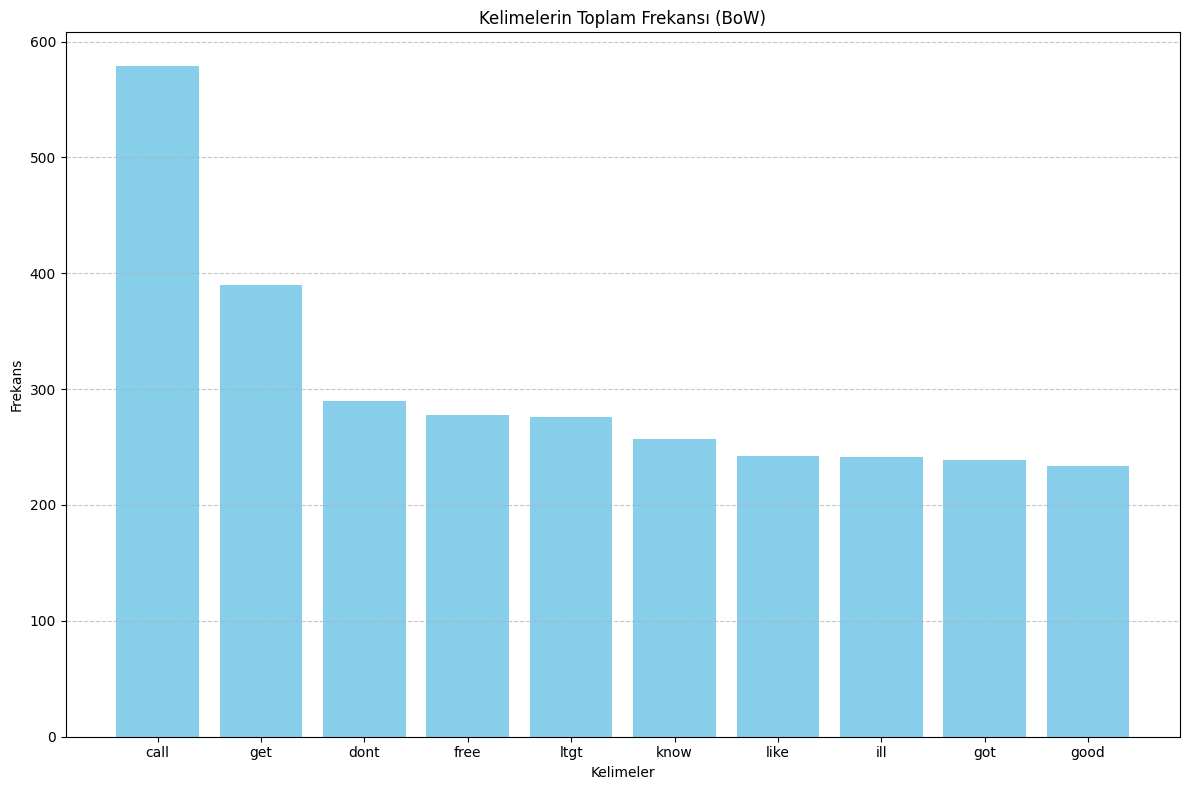

In [41]:
import matplotlib.pyplot as plt
most_common_words_names = [word for word, _ in most_common_10_words]
most_common_words_count = [count for _, count in most_common_10_words]

plt.figure(figsize = (12,8))
plt.bar(most_common_words_names, most_common_words_count, color = "skyblue")
plt.xlabel("Kelimeler")
plt.ylabel("Frekans")
plt.title("Kelimelerin Toplam Frekansı (BoW)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()